# Metoda největšího spádu

Nechť $A=A^T$ a $A>0$ (tj. $\forall x\ne 0:\, x^TAx>0$). Potom lze zavést tzv. energetický funkcionál
$$
f(x) = \frac{1}{2} x^TAx - x^Tb
$$

Gradient $f(x)$ je 
$$
\nabla f(x) = Ax - b.
$$

Metoda největšího spádu je iterační metoda pro řešení soustavy rovnic $Ax=b$ s pozitivně definitní maticí $A$. V každé iteraci se hledá minimum $f(x)$ ve směru největšího spádu. Je-li $x_i$ $i$-tá iterace, pak se minimum hledá na přímce
$x_i + t r_i$ kde $r_i = b - Ax_i$. Tedy
\begin{align*}
f(x_i+tr_i) &= \frac{1}{2}\left(x_i^T+tr_i^T\right)A\left(x_i+tr_i\right) - \left(x_i^T+tr_i^T\right)b = \\
&= \frac{1}{2}x_i^TAx_i + t r_i^TAx_i + \frac{1}{2}t^2 r_i^TAr_i - x_i^Tb - tr_i^Tb = \\
&= \frac{1}{2}t^2 r_i^TAr_i - t r_i^T r_i + f(x_0).
\end{align*}

Z podmínky minima $f$ na dané přímce je 
$$
    t = \frac{r_i^T r_i}{r_i^TAr_i}.
$$

In [1]:
using SparseArrays
using LinearAlgebra
using PyPlot

In [2]:
function gradient_descent(A, b; maxiters=100, tol=1e-6)
    rez = zeros(0)
    x = zeros(size(b))

    for iter=1:maxiters
        r = b - A*x
        rr = dot(r,r)
        rAr = dot(r,A*r)
        append!(rez, sqrt(rr))
        if rAr < tol^2 break end
        t = rr/rAr
        x += t*r
    end
    
    return (solution=x, reziduals=rez)
end

gradient_descent (generic function with 1 method)

In [3]:
function poisson_problem(n)
    A = sparse(4.0*I, n*n, n*n)
    for x=1:n
        for y=1:n
            i = x + (y-1)*n
            if x>1 A[i,i-1] = -1.0 end
            if x<n A[i,i+1] = -1.0 end
            if y>1 A[i,i-n] = -1.0 end
            if y<n A[i,i+n] = -1.0 end
        end
    end
    b = ones(n*n)/(n*n)
    return A,b
end

poisson_problem (generic function with 1 method)

In [4]:
A,b = poisson_problem(20);

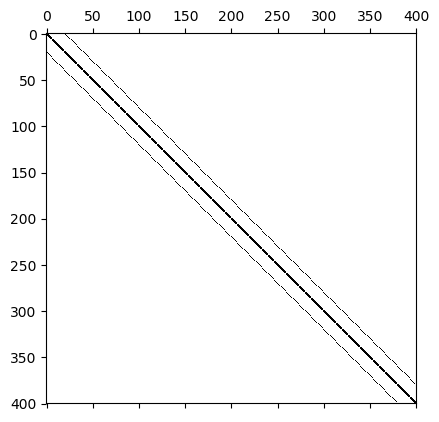

In [5]:
spy(Array(A));

In [6]:
gd = gradient_descent(A, b);

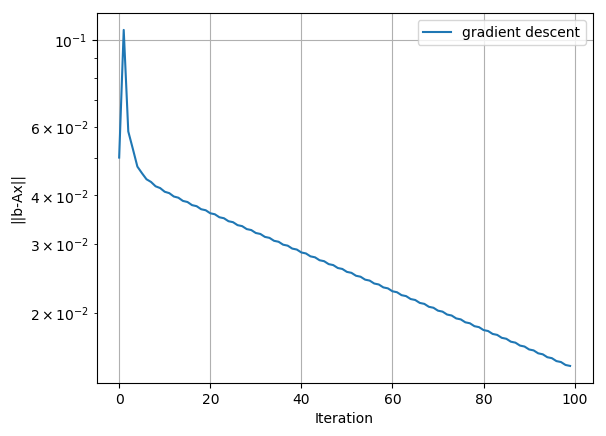

In [7]:
semilogy(gd.reziduals, label="gradient descent");
xlabel("Iteration"); ylabel("||b-Ax||"); 
grid(true); legend(loc="upper right");

# Krylovův podprostor


**Věta:** Nechť $A\in R^{n,n}$ je čtvercová reálná matice a $p_A(\lambda)=\sum_{i=0}^{n}\alpha_i \lambda^i$ její charakteristický polynom. Potom 
$$
p_A(A) = 0.
$$

**Důsledek:** Je-li $\det(A) \ne 0$, pak $\alpha_0 \ne 0$ a
$ E = - \sum_{i=1}^n\frac{\alpha_i}{\alpha_0}A^i = A \left(-\sum_{i=0}^{n-1}\frac{\alpha_{i+1}}{\alpha_0}A^i\right)$ a tedy
$A^{-1} = -\sum_{i=0}^{n-1}\frac{\alpha_{i+1}}{\alpha_0}A^i$.

**Důsledek:** Je-li $\det(A) \ne 0$, pak řešení soustavy rovnic $Ax=b$ je
$x=A^{-1}b = -\sum_{i=0}^{n-1}\frac{\alpha_{i+1}}{\alpha_0}A^i b$.

**Definice:** **Krylovův podprostor** $K_l(b)$ příslšný matici $A$ je definován jako prostor 
$$
 K_l(b) = \mathrm{span}\left\{b, A b, A^2 b, A^3 b, ..., A^{l-1} b \right\}.
$$

**Důsledek:** Je-li $\det(A) \ne 0$, pak řešení soustavy rovnic $Ax=b$ je $x\in K_n(b)$.


# Metoda sdružených gradientů

V této kapitole uvažujeme pouze **symetrické pozitivně definitní** matice $A$.

**Definice:** Vektory $u$ a $v$ nazveme $A$-ortogonální právě tehdy, když $u^TAv=0$.

**Věta:** Nechť $\dim(K_m(b))=m$. Pak existuje $A$-ortogonální báze $K_m(b)$ taková, že $\forall l \le m$ je $K_l(b) = \mathrm{span}\left\{d_0, d_i, ..., d_{l-1}\right\}$. 

Nechť $x_i$ je $i$-tý člen iterační posloupnosti, $x^*=A^{-1}b$, $r_i=b-Ax_i$ a $e_i=x_i-x^*$. 

Iterační posloupnost budeme sestavovat tak, že $x_0=0$ a v každém dalším kroku minimalizujeme $||e_{i+1}||_A = (e_{i+1}^TAe_{i+1})^{1/2}$ v $K_{i+1}(b)$. Jestliže $x_{i}$ minimalizuje $||e_{i}||_A$, pak
$$
    e_{i} \in \mathrm{span}\left\{ d_{i+1}, d_{i+2}, ..., d_m\right\}.
$$
a
$$
    e_{i+1} = e_{i} + \alpha_i d_i,
$$
a protože $x_{i+1}-x_{i}=e_{i+1}-e_{i}$ je
$$
    x_{i+1} = x_{i} + \alpha_i d_i.
$$

Vektor $e_i$ minimalizuje $e_i^TAe_i$, navíc $Ae_i = - r_i$, je 
\begin{align*}
    e_{i+1}^TAe_{i+1} &= (e_i^T + \alpha_i d_i^T) A (e_i + \alpha_i d_i) = \\
    &= e_i^T A e_i + 2 \alpha_i d_i^T A e_i + \alpha_i^2 d_i^T A d_i = \\
    &= \alpha_i^2 d_i^T A d_i - 2 \alpha_i d_i^T r_i + e_i^T A e_i.
\end{align*}

Tedy
$$
    \alpha_i = \frac{d_i^T r_i}{d_i^T A d_i}
$$

Nové reziduum je
$$
    r_{i+1} = b - Ax_{i+1} = b - Ax_i - \alpha_i A d_i = r_i - \alpha_i A d_i.
$$

Nový směr hledáme tak, aby byl $A$-ortogonální k předchozím směrům
$$
    d_{i+1} = r_{i+1} - \beta_i d_i
$$
kde
$$
    \beta_i = - \frac{r_{i+1}^TAd_i}{d_i^TAd_i}.
$$

## Úprava koeficientů $\alpha$ a $\beta$

Protože $e_{i} \in \mathrm{span}\left\{ d_{i+1}, d_{i+2}, ..., d_m\right\}$, je
$$
  d_j^T A e_i = 0 \text{ pro } j<i,
$$
a tedy $d_j^T r_i = 0$ neboli $r_i \in K_{i-1}(b)^\bot$ a $\left\{r_j\right\}_{j=0}^{i-1}$ tvoří ortogonální bázi $K_i(b)$.

Proto
$$
d_i^T r_i = (r_i^T + \alpha_{i-1}d_{i-1}^T) r_i = r_i^T r_i
$$
a koeficient $\alpha$ je potom možné upravit na
$$
    \alpha_i = \frac{r_i^T r_i}{d_i^T A d_i}.
$$

Ze vzorce pro $r_{i+1}$ plyne
$$
    A d_i = \frac{1}{\alpha_i}(r_i - r_{i+1})
$$
a tedy (díku vzájemné ortogonalitě $r_i$)
$$
    r_{i+1}^T A d_i = \frac{1}{\alpha_i} r_{i+1}^T (r_i - r_{i+1}) = - \frac{1}{\alpha_i} r_{i+1}^T r_{i+1}.
$$

Výraz $d_i^TAd_i$ lze přepsat jako
$$
d_i^TAd_i = (r_i^T - \beta_{i-1}d_{i-1}^T) A d_i = r_i^T A d_i = r_i^T \frac{1}{\alpha_i}(r_i - r_{i+1}) = 
\frac{1}{\alpha_i} r_i^T r_i.
$$

Koeficient $\beta_i$ je tedy
$$
    \beta_i = \frac{r_{i+1}^Tr_{i+1}}{r_i^Tr_i}.
$$

In [8]:
function conjugate_gradients(A, b; maxiters=100, tol=1e-6)
    rez = zeros(0)
    d = copy(b)
    x = zeros(size(b))
    r = b - A*x
    rr_old = dot(r,r)
    append!(rez, sqrt(rr_old))
    
    for iter=1:maxiters
        Ad = A*d
        α = rr_old / dot(d,Ad)
        x += α*d
        r -= α*Ad
        rr_new = dot(r,r)
        append!(rez, rr_new)
        if rr_new < tol^2 break end
        d = r + rr_new/rr_old * d
        rr_old = rr_new
    end
    
    return (solution=x, reziduals=rez)
end

conjugate_gradients (generic function with 1 method)

In [9]:
cg = conjugate_gradients(A,b);

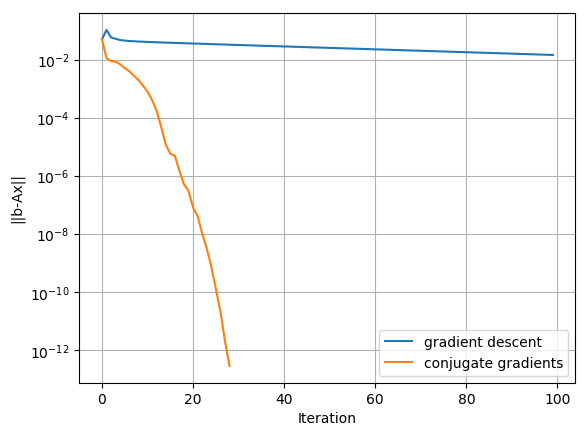

In [10]:
semilogy(gd.reziduals, label="gradient descent");
semilogy(cg.reziduals, label="conjugate gradients");
xlabel("Iteration"); ylabel("||b-Ax||"); 
grid(true); legend(loc="lower right");

## Předpodmínění

Řešíme 
$$
P^{-1}Ax = P^{-1}b,
$$
kde $A$ a $P$ jsou symetrické pozitifně definitní matice. Bohužel součin $P^{-1}A$ nemusí být symetrický pozitivně definitní, proto je třeba systém upravit pomocí vztahu $P = QQ^T$ na
$$
  Q^{-T}Q^{-1} A Q^{-T} Q^{-1} Q Q^T x = Q^{-T} Q^{-1} b,
$$
neboli
$$
  (Q^{-1} A Q^{-T}) (Q^T x) = Q^{-1} b,
$$

Řešíme tedy nejprve $\hat{A}\hat{x}=Q^{-1}b$, kde $\hat{A}=Q^{-1} A Q^{-T}$, poté $Q^T x = \hat{x}$.
Celý postup je potom následující:
- $\hat{d}_0 = \hat{r}_0 = Q^{-1}b - \hat{A} \hat{x}_0,$
- $\alpha_i = (\hat{r}_i^T \hat{r}_i) / (\hat{d}_i^T \hat{A} \hat{d}_i),$
- $\hat{x}_{i+1} = \hat{x}_i + \alpha_i \hat{d}_i,$
- $\hat{r}_{i+1} = \hat{r}_i - \alpha_i \hat{A}\hat{d_i},$
- $\beta_i = (\hat{r}_{i+1}^T\hat{r}_{i+1}) / (\hat{r}_{i}^T\hat{r}_{i}),$
- $\hat{d}_{i+1} = \hat{r}_{i+1} - \beta_i \hat{d}_i.$

Označme $\hat{r}_i = Q^{-1} r_i$, $\hat{d}_i=Q^{T}d_i$ a využijme vztahů $\hat{x}_i = Q^T x_i$ a $Q^{-T}Q^{-1}=P^{-1}$. Potom lze výše uvedený algoritmus přepsat jako
- $r_0 = b - A x_0,$
- $d_0 = P^{-1} r_0,$
- $\alpha_i = (r_i^T P^{-1}r_i) / (d_i^T A d_i),$
- $x_{i+1} = x_i + \alpha_i d_i,$
- $r_{i+1} = r_i - \alpha_i A d_i,$
- $\beta_i = (r_{i+1}^TP^{-1}r_{i+1}) / (r_{i}^TP^{-1}r_{i}),$
- $d_{i+1} = P^{-1}r_{i+1} - \beta_i d_i.$

In [11]:
function preconditioned_conjugate_gradients(A, b, P; maxiters=100, tol=1e-6)
    rez = zeros(0)
    x = zeros(size(b))
    r = b - A*x
    d = P \ r
    rr_old = dot(r,d)
    append!(rez, sqrt(rr_old))
    
    for iter=1:maxiters
        Ad = A*d
        α = rr_old / dot(d,Ad)
        x += α*d
        r -= α*Ad
        q = P\r
        rr_new = dot(r,q)
        append!(rez, rr_new)
        if rr_new < tol^2 break end
        d = q + rr_new/rr_old * d
        rr_old = rr_new
    end
    
    return (solution=x, reziduals=rez)
end

preconditioned_conjugate_gradients (generic function with 1 method)

In [12]:
P = Tridiagonal(A);
pcg = preconditioned_conjugate_gradients(A,b,P);

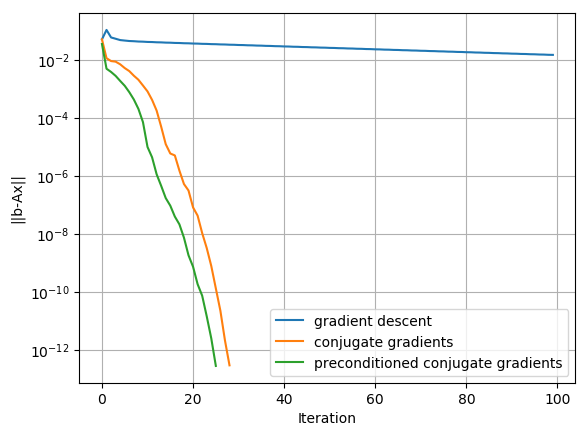

In [13]:
semilogy(gd.reziduals, label="gradient descent");
semilogy(cg.reziduals, label="conjugate gradients");
semilogy(pcg.reziduals, label="preconditioned conjugate gradients");
xlabel("Iteration"); ylabel("||b-Ax||"); 
grid(true); legend(loc="lower right");

In [14]:
A250, b250 = poisson_problem(250);

In [15]:
gd250 = gradient_descent(A250,b250,maxiters=200);

In [16]:
cg250 = conjugate_gradients(A250, b250, maxiters=200);

In [17]:
P250 = Tridiagonal(A250);
pcg250 = preconditioned_conjugate_gradients(A250,b250,P250,maxiters=200);

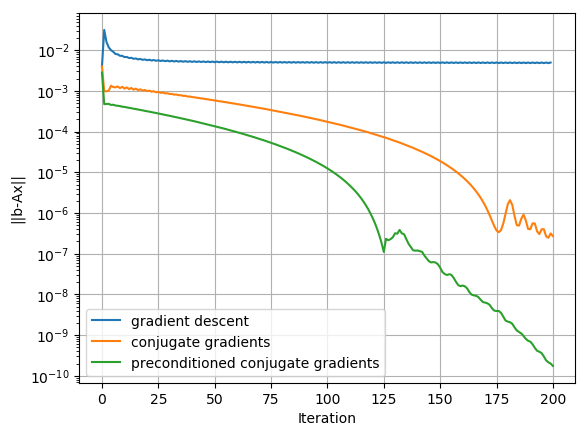

In [18]:
semilogy(gd250.reziduals, label="gradient descent");
semilogy(cg250.reziduals, label="conjugate gradients");
semilogy(pcg250.reziduals, label="preconditioned conjugate gradients");
xlabel("Iteration"); ylabel("||b-Ax||"); 
grid(true); legend(loc="lower left");

# GMRES metoda

Iterační posloupnost je sestavována tak, že $x_i$ minimalizuje $||r_i||$ na prostoru $K_i(b)$.

In [19]:
function GMRES(A, b, x0; maxiters=100, tol=1e-6)

    function apply_givens_rotations!(h,c,s,k)
        for i=1:k-2
            tmp = cs[i]*h[i] + sn[i]*h[i+1]
            h[i+1] = -sn[i]*h[i] + cs[i]*h[i+1]
            h[i] = tmp
        end
        
        if h[k-1]==0.0
            cs[k-1] = 0.0
            sn[k-1] = 1.0
        else
            tmp=sqrt(h[k]^2+h[k-1]^2)
            cs[k-1] = abs(h[k-1]) / tmp
            sn[k-1] = cs[k-1] * h[k] / h[k-1]
        end
        
        h[k-1] = cs[k-1]*h[k-1] + sn[k-1]*h[k]
        h[k] = 0.0
    end
    
    n = size(b,1)
    m = maxiters
    
    r = b - A*x0
    
    r_norm = norm(r)
    b_norm = norm(b)
    
    rezid = [r_norm/b_norm]
    
    H = zeros(m+1,m)
    V = zeros(n,m+1)
    V[:,1] = r/r_norm
    cs = zeros(m)
    sn = zeros(m)
    β = zeros(m+1)
    β[1] = r_norm
    
    k1=0
    for k=2:maxiters+1
        k1 = k-1
        
        # Arnoldi proces
        V[:,k] = A*V[:,k-1]
        for j=1:k-1
            H[j,k-1] = dot(V[:,j], V[:,k])
            V[:,k] -= H[j,k-1]*V[:,j]
        end
        H[k,k-1] = norm(V[:,k])
        V[:,k] /= H[k,k-1]
        
        # Eliminace posledniho elementu pomoci Givensovych rotaci
        apply_givens_rotations!(view(H,1:k,k-1),cs,sn,k)
        
        
        β[k]   = -sn[k-1]*β[k-1];
        β[k-1] = cs[k-1]*β[k-1];
   
        error = abs(β[k]) / b_norm
        append!(rezid, error)    
    
        if error <= tol break end
    end
    
    y = H[1:k1,1:k1] \ β[1:k1]
    x = x0 + V[:,1:k1]*y
    return (solution=x, reziduals=rezid)
        
end

GMRES (generic function with 1 method)

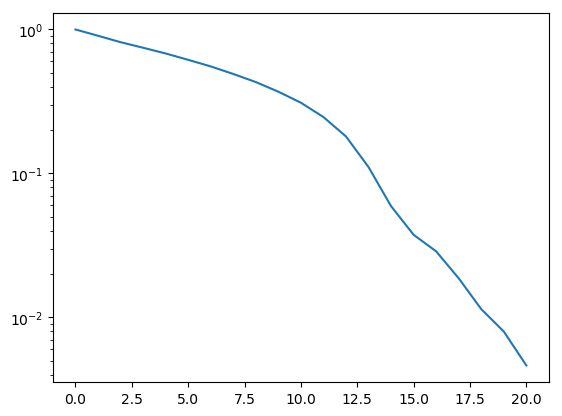

In [20]:
x0 = zeros(size(b,1))
gm = GMRES(A,b,x0,maxiters=20)
semilogy(gm.reziduals);

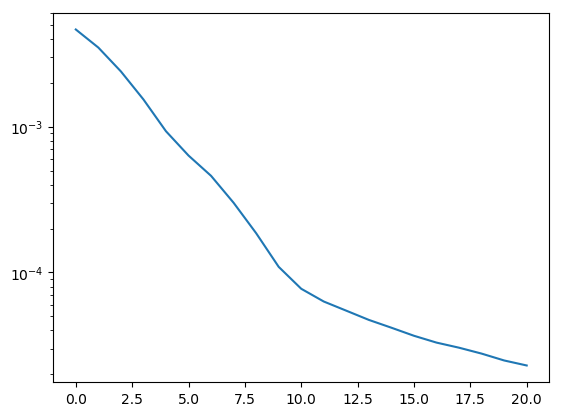

In [21]:
x = copy(gm.solution)
gm1 = GMRES(A,b,x,maxiters=20);
semilogy(gm1.reziduals);

In [22]:
function GMRESR(A, b, x0; restart=20, maxiters=100, tol=1e-8)
    x = copy(x0)
    rezid = zeros(0)
    while size(rezid,1)<maxiters
        sol = GMRES(A, b, x, maxiters=restart, tol=tol)
        x = sol.solution
        append!(rezid, sol.reziduals)
        if rezid[end] < tol break end
    end
    return (solution=x, reziduals=rezid)
end     

GMRESR (generic function with 1 method)

In [23]:
x0 = zeros(size(b,1))
gmr10 = GMRESR(A,b,x0,restart=10);

In [24]:
gmr20 = GMRESR(A,b,x0,restart=20);

In [25]:
gmr40 = GMRESR(A,b,x0,restart=40);

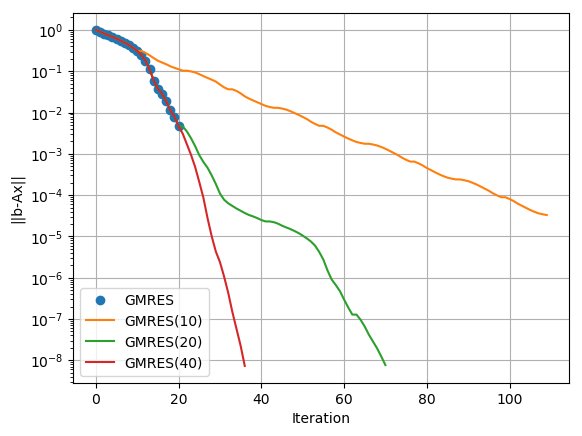

In [26]:
semilogy(gm.reziduals, "o", label="GMRES");
semilogy(gmr10.reziduals, label="GMRES(10)");
semilogy(gmr20.reziduals, label="GMRES(20)");
semilogy(gmr40.reziduals, label="GMRES(40)");
xlabel("Iteration"); ylabel("||b-Ax||"); 
grid(true); legend(loc="lower left");